# Import Libraries

In [1]:
# libraries for analysis
import numpy as np
import pandas as pd
from sklearn import svm
# Library for visuals
import matplotlib.pyplot as plt
from tabulate import tabulate

# Define Functions

In [2]:
def plotData(df, l1, l2, title):
    """Fungsi plot titik-titik data ke grafik.
        Dengan parameter L1 & L2 sebagai posisi untuk kotak legend 
        dan title sebagai judul pada grafik"""
    # class of +1 & -1 
    df_plus1 = df.loc[df['y'] == 1]
    df_min1 = df.loc[df['y'] == -1]
    # plot the data
    plt.grid()
    plt.scatter(df_plus1['x1'], df_plus1['x2'], color='blue', label='Kelas +1')
    plt.scatter(df_min1['x1'], df_min1['x2'], color='red', label='Kelas -1')
    plt.legend(bbox_to_anchor=(l1, l2), fancybox=True, shadow=True)
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.title(title)
    plt.axis('tight')
    plt.show()
    
def plotLinearHyperplane(df, title, model, r1, r2, l1, l2):
    """Fungsi plot linear hyperplane pada grafik.
        Degan parameter input df sebagai dataset yang digunakan,
        title sebagai judul pada grafik,
        model sebagai model SVM yang digunakan,
        R1 & R2 sebagai batas awal dan akhir pada koordinat x dan y,
        L1 & L2 sebagai posisi kotak legend pada grafik"""
    # Get the separating hyperplane
    w = model.coef_[0]
    a = -w[0] / w[1]
    xx = np.linspace(r1, r2)
    yy = a * xx - (model.intercept_[0]) / w[1]
    # Plot the parallels to the separating hyperplane that pass through the support vectors
    b = model.support_vectors_[0]
    yy_down = a * xx + (b[1] - a * b[0])
    b = model.support_vectors_[-1]
    yy_up = a * xx + (b[1] - a * b[0])
    # plot support vectors
    plt.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=125, 
                linewidth=2, facecolors='none', edgecolors='black', label='Support Vectors')
    # plot hyperplane
    plt.plot(xx, yy, 'k-')
    plt.plot(xx, yy_down, 'k--')
    plt.plot(xx, yy_up, 'k--')
    # plot data points
    plotData(df, l1, l2, title)
    
def plotNonLinearHyperplane(model, ax=None, plot_support=True):
    """Plot the non-linear hyperplane to graph"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

# Penyelesaian No. 1

## Data

In [3]:
# Data untuk no. 1
x1_1 = [1, 1, 0, -1]
x1_2 = [1, -1, 2, -1]
y1 = [1, -1, -1, -1]
sv1 = [1, 1, 1, 0]
df1 = pd.DataFrame(list(zip(x1_1, x1_2, y1, sv1)),
                   columns = ['x1' , 'x2', 'y', 'SV'])
print('Data 1:')
print(tabulate(df1, headers='keys', showindex=False, tablefmt="pretty"))

Data 1:
+----+----+----+----+
| x1 | x2 | y  | SV |
+----+----+----+----+
| 1  | 1  | 1  | 1  |
| 1  | -1 | -1 | 1  |
| 0  | 2  | -1 | 1  |
| -1 | -1 | -1 | 0  |
+----+----+----+----+


## Data Visualization 

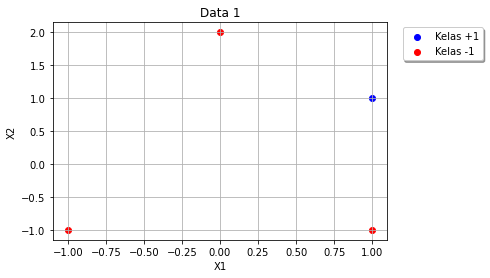

In [4]:
plotData(df1, 1.3, 1, 'Data 1')

## Define Model 

In [5]:
# training set
X1 = [list(a) for a in zip(x1_1, x1_2)]
# define model
model1 = svm.SVC(kernel='linear', C=5).fit(X1, y1)

## Hyperplane Visualization 

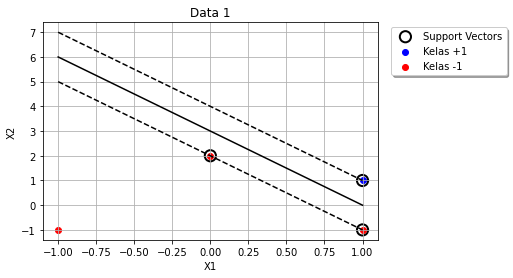

In [6]:
plotLinearHyperplane(df1, 'Data 1', model1, -1, 1, 1.4, 1)

## Support Vectors 

In [7]:
print(model1.support_vectors_)

[[ 1. -1.]
 [ 0.  2.]
 [ 1.  1.]]


# Penyelesaian No. 2

## Data 

In [8]:
# Data untuk no. 2
x2_1 = [2, 3, 5, 6]
x2_2 = [3, 4, 2, 3]
y2 = [-1, -1, 1, 1]
sv2_1 = [1, 1, 1, 0]
sv2_2 = [0, 1, 1, 0]
df2 = pd.DataFrame(list(zip(x2_1, x2_2, y2, sv2_1, sv2_2)),
                   columns = ['x1' , 'x2', 'y', 'SV1', 'SV2'])
print('Data 2:')
print(tabulate(df2, headers='keys', showindex=False, tablefmt="pretty"))

Data 2:
+----+----+----+-----+-----+
| x1 | x2 | y  | SV1 | SV2 |
+----+----+----+-----+-----+
| 2  | 3  | -1 |  1  |  0  |
| 3  | 4  | -1 |  1  |  1  |
| 5  | 2  | 1  |  1  |  1  |
| 6  | 3  | 1  |  0  |  0  |
+----+----+----+-----+-----+


## Data Visualization 

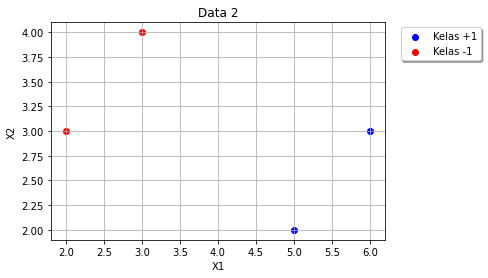

In [9]:
plotData(df2, 1.3, 1, 'Data 2')

## Define Model 

In [10]:
# training set
X2 = [list(a) for a in zip(x2_1, x2_2)]
# define model
model2 = svm.SVC(kernel='linear', C=0.25).fit(X2, y2)

## Hyperplane Visualization 

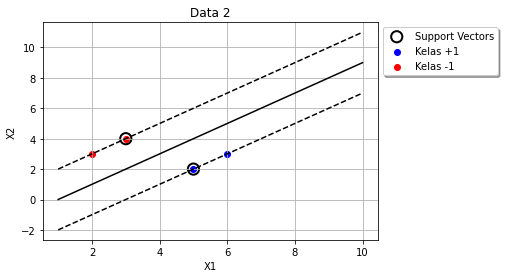

In [11]:
plotLinearHyperplane(df2, 'Data 2', model2, 1, 10, 1, 1)

## Support Vectors 

In [12]:
print(model2.support_vectors_)

[[3. 4.]
 [5. 2.]]


# Penyelesaian No. 3

## Data 

In [13]:
# Data untuk no. 3
x3_1 = [0.5, 1, -1, -0.5]
x3_2 = [0, -1, 1, 0.5]
y3 = [-1, 1, 1, -1]
sv3 = [1, 1, 1, 1]
df3 = pd.DataFrame(list(zip(x3_1, x3_2, y3, sv3)),
                   columns = ['x1' , 'x2', 'y', 'SV'])
print('Data 3:')
print(tabulate(df3, headers='keys', showindex=False, tablefmt="pretty"))

Data 3:
+------+------+------+-----+
|  x1  |  x2  |  y   | SV  |
+------+------+------+-----+
| 0.5  | 0.0  | -1.0 | 1.0 |
| 1.0  | -1.0 | 1.0  | 1.0 |
| -1.0 | 1.0  | 1.0  | 1.0 |
| -0.5 | 0.5  | -1.0 | 1.0 |
+------+------+------+-----+


## Data Visualization 

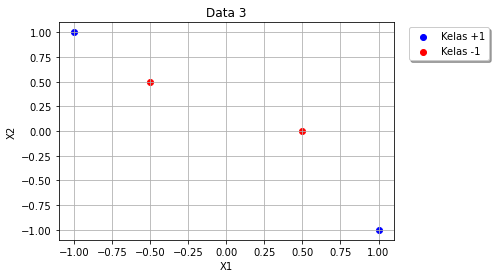

In [14]:
plotData(df3, 1.3, 1, 'Data 3')

## Define Model 

In [15]:
# train set
X3 = [list(a) for a in zip(x3_1, x3_2)]
# define model
model3 = svm.SVC(kernel='rbf', C=2, gamma=1.5).fit(X3, y3)

## Hyperplane Visualization 

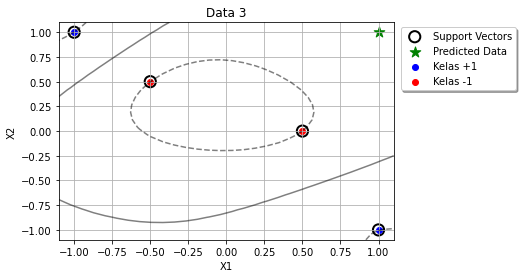

In [16]:
# plot support vectors
plt.scatter(model3.support_vectors_[:, 0], model3.support_vectors_[:, 1],
            s=125, linewidth=2, facecolors='none', edgecolors='black', label='Support Vectors');
# plot hyperplane
plotNonLinearHyperplane(model3)
# plot predicted data (1,1)
plt.scatter(1, 1, color='green', s=125, marker='*', label='Predicted Data')
# plot data points
plotData(df3, 1.38, 1, 'Data 3')

## Support Vectors 

In [17]:
print(model3.support_vectors_)

[[ 0.5  0. ]
 [-0.5  0.5]
 [ 1.  -1. ]
 [-1.   1. ]]


## Data Prediction 

In [18]:
pred = model3.predict([[1,1]])
print(pred[0])

-1


## RBF Formula 

In [19]:
print('Nilai dari theta_i:')
print(model3.dual_coef_[0])

Nilai dari theta_i:
[-1.01004878 -1.77513911  1.0481248   1.73706309]


In [20]:
print('Nilai dari ro:')
print(model3.intercept_[0])

Nilai dari ro:
0.1086381032801449
